In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
df = pd.read_csv('C:/Users/carlo/OneDrive/Ambiente de Trabalho/Esade/1st term/Cloud Computing/Final Project/Deliverables/database.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Plotting and Database Analysis

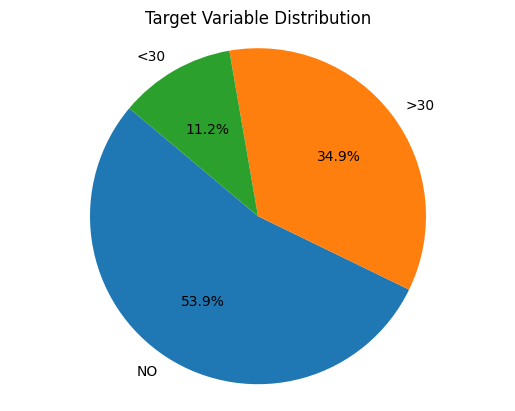

In [32]:
import matplotlib.pyplot as plt

# Couting the values for the target variable
target_counts = df['readmitted'].value_counts()

# Defining labels
labels = target_counts.index.tolist() 

# Defining values
sizes = target_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Target Variable Distribution")
plt.axis('equal')
plt.show()

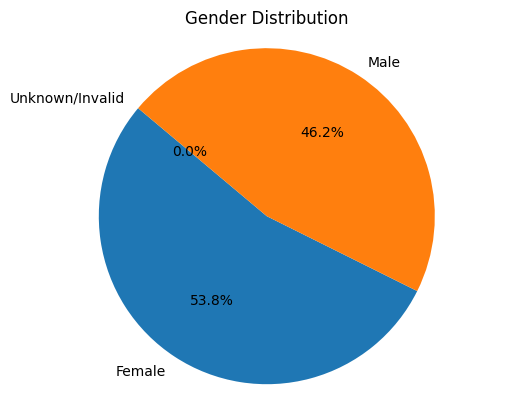

In [33]:
# Couting the values for the target variable
target_counts = df['gender'].value_counts()

# Defining labels
labels = target_counts.index.tolist() 

# Defining values
sizes = target_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

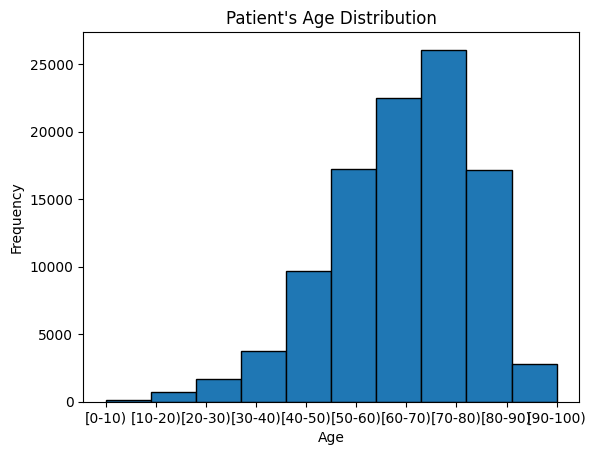

In [34]:
# Patient's Age Distribution
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title("Patient's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Modeling and Prediction

In [35]:
#Defining target and feature matrix
X = df[['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'insulin', 'diabetesMed']]
y = df['readmitted']

In [36]:
df = df[['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'insulin', 'diabetesMed', 'readmitted']]
df

,gender,age,time_in_hospital,num_lab_procedures,insulin,diabetesMed,readmitted
0,Female,[0-10),1,41,No,No,NO
1,Female,[10-20),3,59,Up,Yes,>30
2,Female,[20-30),2,11,No,Yes,NO
3,Male,[30-40),2,44,Up,Yes,NO
4,Male,[40-50),1,51,Steady,Yes,NO
...,...,...,...,...,...,...,...
101761,Male,[70-80),3,51,Down,Yes,>30
101762,Female,[80-90),5,33,Steady,Yes,NO
101763,Male,[70-80),1,53,Down,Yes,NO
101764,Female,[80-90),10,45,Up,Yes,NO


In [55]:
df['diabetesMed'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
#Understanding the sample
y.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [38]:
#Check for missing values in the target variable
print(f'The number of missing values in the target variable is {y.isna().sum()}')

The number of missing values in the target variable is 0


In [39]:
#Turning the target into a binary value
y = y.replace('>30', 0)
y = y.replace('<30', 1)
y = y.replace('NO', 0)

C:\Users\carlo\AppData\Local\Temp\ipykernel_17764\1698730904.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('NO', 0)


In [40]:
X

,gender,age,time_in_hospital,num_lab_procedures,insulin,diabetesMed
0,Female,[0-10),1,41,No,No
1,Female,[10-20),3,59,Up,Yes
2,Female,[20-30),2,11,No,Yes
3,Male,[30-40),2,44,Up,Yes
4,Male,[40-50),1,51,Steady,Yes
...,...,...,...,...,...,...
101761,Male,[70-80),3,51,Down,Yes
101762,Female,[80-90),5,33,Steady,Yes
101763,Male,[70-80),1,53,Down,Yes
101764,Female,[80-90),10,45,Up,Yes


In [41]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
print('The number of missing values in the X matrix are:')

for col in X.columns:
    print(col,X[col][X[col] == '?'].count())

    
#Since there aren't missing values, we don't need to impute them

The number of missing values in the X matrix are:
gender 0
age 0
time_in_hospital 0
num_lab_procedures 0
insulin 0
diabetesMed 0


In [42]:
#Treating the age column as the middle point in each interval
X = X.copy()

for i in range(0,10):
    X['age'] = X['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (i*10)+5)
    
#X['age'].value_counts()

X

C:\Users\carlo\AppData\Local\Temp\ipykernel_17764\3234336768.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['age'] = X['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (i*10)+5)


,gender,age,time_in_hospital,num_lab_procedures,insulin,diabetesMed
0,Female,5,1,41,No,No
1,Female,15,3,59,Up,Yes
2,Female,25,2,11,No,Yes
3,Male,35,2,44,Up,Yes
4,Male,45,1,51,Steady,Yes
...,...,...,...,...,...,...
101761,Male,75,3,51,Down,Yes
101762,Female,85,5,33,Steady,Yes
101763,Male,75,1,53,Down,Yes
101764,Female,85,10,45,Up,Yes


In [43]:
print(X['age'].std())
print(X['age'].mean())

print(X['time_in_hospital'].std())
print(X['time_in_hospital'].mean())


print(X['num_lab_procedures'].std())
print(X['num_lab_procedures'].mean())

15.940837693288776
65.96702238468644
2.9851077674705677
4.395986871843248
19.67436224914256
43.09564098028811


In [44]:
#Dividing the features into arrays, insulin' have to be treated on the side
cat_columns = ['insulin', 'gender', 'diabetesMed']
num_columns = ['time_in_hospital', 'num_lab_procedures', 'age']

In [45]:
#Removing the outliers for lead_time, previous_cancellations and booking_changes
X = X.copy()  # Create a copy of the DataFrame to avoid slicing issues

for col in num_columns:
    lower_quantile = X[col].quantile(0.05)
    upper_quantile = X[col].quantile(0.95)
    X[col] = np.where(X[col] < lower_quantile, lower_quantile, 
                      np.where(X[col] > upper_quantile, upper_quantile, X[col]))

X


,gender,age,time_in_hospital,num_lab_procedures,insulin,diabetesMed
0,Female,35.0,1.0,41.0,No,No
1,Female,35.0,3.0,59.0,Up,Yes
2,Female,35.0,2.0,11.0,No,Yes
3,Male,35.0,2.0,44.0,Up,Yes
4,Male,45.0,1.0,51.0,Steady,Yes
...,...,...,...,...,...,...
101761,Male,75.0,3.0,51.0,Down,Yes
101762,Female,85.0,5.0,33.0,Steady,Yes
101763,Male,75.0,1.0,53.0,Down,Yes
101764,Female,85.0,10.0,45.0,Up,Yes


In [ ]:
#Imputing the values for the numerical columns
numerical_imputer = SimpleImputer(strategy="mean")


#Building the pipeline for the gender column
diabetesmed_pipeline = Pipeline([
    ("most_frequent", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False))
])


#Preprocessing categorical features:
ordinal_encoder = OrdinalEncoder(categories=[
    ['No', 'Down', 'Steady', 'Up'],  # Categories for 'insulin'
    ['Male', 'Female', 'Unknown/Invalid'],  # Categories for 'gender'
    ['No', 'Yes']   # Categories for 'diabetesMed'
])

categorical_pipeline = Pipeline([
    ("most_frequent", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder", ordinal_encoder)
])



transformer = ColumnTransformer([
    ('num_imputer', numerical_imputer, num_columns),
    ('categorical_pipeline', categorical_pipeline, cat_columns)
], remainder="passthrough")


X_processed = transformer.fit_transform(X)

print(pd.DataFrame(X_processed).head(7))


     0     1     2    3    4    5
0  1.0  41.0  35.0  0.0  1.0  0.0
1  3.0  59.0  35.0  3.0  1.0  1.0
2  2.0  11.0  35.0  0.0  1.0  1.0
3  2.0  44.0  35.0  3.0  0.0  1.0
4  1.0  51.0  45.0  2.0  0.0  1.0
5  3.0  31.0  55.0  2.0  0.0  1.0
6  4.0  70.0  65.0  2.0  0.0  1.0


In [47]:
model_pipe = Pipeline(steps = [
    ("transformer", transformer),
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(class_weight='balanced'))
]
)

In [48]:
#Dividing the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model_pipe.fit(X_train, y_train)
y_pred = model_pipe.predict(X_test)

#Check the model's accuracy
print(f"Logistic Regression Accuracy: {model_pipe.score(X_train, y_train)}")

Logistic Regression Accuracy: 0.5612071930427946


In [50]:
# Get the logistic regression coefficients and intercept
logistic_regression = model_pipe.named_steps['classifier']
coefficients = logistic_regression.coef_[0]
intercept = logistic_regression.intercept_[0]

# Get the feature names after preprocessing
feature_names = model_pipe.named_steps['transformer'].get_feature_names_out()

# Create a DataFrame to display coefficients with their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

print(coef_df)

                             Feature  Coefficient
0                          Intercept    -0.011573
1      num_imputer__time_in_hospital     0.125718
2    num_imputer__num_lab_procedures     0.024186
3                   num_imputer__age     0.043667
4      categorical_pipeline__insulin     0.036042
5       categorical_pipeline__gender     0.002343
6  categorical_pipeline__diabetesMed     0.061733


In [51]:
# Evaluating the model's predictive capacity
cm = confusion_matrix(y_test, y_pred)
print('Logistic Regression Confusion Matriz:\n', cm)

report = classification_report(y_test, y_pred)
print('\n\nLogistic Regression Classification Report:\n', report)

Logistic Regression Confusion Matriz:
 [[10238  7831]
 [ 1110  1175]]


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.57      0.70     18069
           1       0.13      0.51      0.21      2285

    accuracy                           0.56     20354
   macro avg       0.52      0.54      0.45     20354
weighted avg       0.82      0.56      0.64     20354



In [52]:
#Saving the trained model in streamlit in joblib to load it to the streamlit file
import joblib

joblib.dump(model_pipe, 'ml_model.pkl')

['ml_model.pkl']